### Data Preprocessing Pipeline
In this section, you will implement data preprocessing pipeline in Question 1.

In [19]:
! pip install -q openpyxl

In [20]:
import os
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold

In [21]:
data_dir = ""
Path(os.path.join(data_dir, 'processed')).mkdir(parents=True, exist_ok=True)

In [22]:
# Read data
df = pd.read_excel(os.path.join(data_dir, 'train.xlsx'))

In [23]:
# Rename columns
df = df.rename(columns={"PATIENT_ID": "PatientID", "outcome": "Outcome", "sex": "Sex", "age": "Age", "RE_DATE": "RecordTime", "Admission time": "AdmissionTime", "Discharge time": "DischargeTime"})

In [24]:
# 1.1 TODO: Fill in the Patient ID column.
df['PatientID'] = df['PatientID'].fillna(method='ffill')

In [25]:
# 1.2 TODO: Convert sex to integer encoding: 0—female, 1—male
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

In [26]:
# 1.3 TODO: Convert all datetime to string format
df['RecordTime'] = pd.to_datetime(df['RecordTime'])
df['AdmissionTime'] = pd.to_datetime(df['AdmissionTime'])
df['DischargeTime'] = pd.to_datetime(df['DischargeTime'])

# Convert to string format
df['RecordTime'] = df['RecordTime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['AdmissionTime'] = df['AdmissionTime'].dt.strftime('%Y-%m-%d %H:%M:%S')
df['DischargeTime'] = df['DischargeTime'].dt.strftime('%Y-%m-%d %H:%M:%S')


In [27]:
# 1.4 TODO: Exclude patients with missing labels
# remove rows with missing ID and time points 

df = df.dropna(subset=['PatientID', 'RecordTime', 'AdmissionTime', 'DischargeTime'])

In [28]:
# 1.5 TODO: Calculate the Length-of-Stay (LOS) label (LOS: DischargeTime - RecordTime)

df['DischargeTime'] = pd.to_datetime(df['DischargeTime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
df['RecordTime'] = pd.to_datetime(df['RecordTime'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df['LOS'] = (df['DischargeTime'] - df['RecordTime']).dt.days


In [29]:
# 1.6 TODO: Set negative LOS values to 0
df['LOS'] = df['LOS'].apply(lambda x: max(0, x))

In [30]:
# 1.7 TODO: Drop columns whose values are all the same or all NaN

df.drop_duplicates(subset=df.columns[7:], keep=False, inplace=True)
df.dropna(subset=df.columns[7:], how='all', inplace=True)



In [31]:
# 1.8 TODO: Compress all data rows to one row for each patient
df = df.groupby('PatientID').median().reset_index()

/var/folders/c_/t9gykjb919v3fc912l8ql86h0000gn/T/ipykernel_21307/2975945908.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby('PatientID').median().reset_index()


In [32]:
# 1.9 TODO: Remove features that have more than 10% missing values
missing_vals = df.isna().mean() * 100
df = df.loc[:, missing_vals <= 10]

In [33]:
# 1.10 TODO: Data imputation
df = df.fillna(df.median())

In [34]:
# TODO: Save your processed dataframe

import os
processed_folder = 'processed'
os.makedirs(processed_folder, exist_ok=True)

df.to_csv(os.path.join(processed_folder, 'processed_data.csv'), index=False)


In [35]:
# 1.11 What other data preprocessing steps can you come up with? 
#       Implement them and explain why you use them here.

from sklearn.preprocessing import StandardScaler

columns_to_exclude = ['Outcome', 'LOS']
df_to_scale = df.drop(columns=columns_to_exclude)
scaler = StandardScaler()
scaled_values = scaler.fit_transform(df_to_scale)
df_scaled = pd.DataFrame(scaled_values, columns=df_to_scale.columns)
for col in columns_to_exclude:
    df_scaled[col] = df[col]

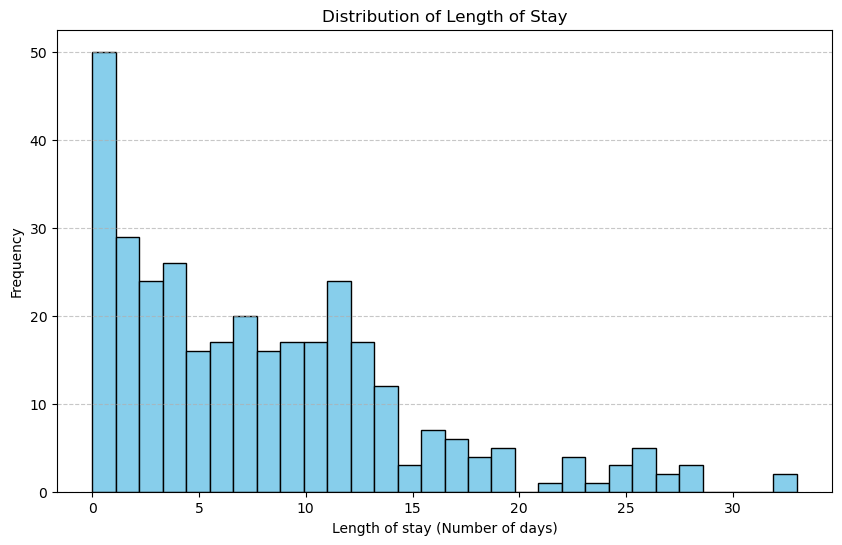

In [36]:
# 1.12 TODO: Plot your LOS distribution
plt.figure(figsize=(10, 6))
plt.hist(df_scaled['LOS'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Length of Stay')
plt.xlabel('Length of stay (Number of days)')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()